In [2]:
import uproot as up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak
import os

In [3]:
import sys
sys.path.append("/remote/gpu03/schiller/JetCalibration")

In [4]:
path_data_folder = "/remote/gpu07/huetsch/JetCalibration/data_v2"

files = os.listdir(path_data_folder)
files = [file for file in files if file.endswith(".npy") and "full_data" not in file]
print(len(files))

83


In [5]:
n_files = 1

files = files[:n_files]

target_data = []

for i in range(len(files)):
    file = os.path.join(path_data_folder, files[i])
    data_i = np.load(file)
    nan_mask = np.isnan(data_i).any(axis=1)
    inf_mask = np.isinf(data_i).any(axis=1)
    data_i = data_i[~nan_mask & ~inf_mask]

    target_data.append(data_i[:, :2])

target_data = np.concatenate(target_data, axis=0)

print(f"target_data: {target_data.shape}")

min_values = np.min(target_data, axis=0)
max_values = np.max(target_data, axis=0)

print(f"min_values: {min_values}")
print(f"max_values: {max_values}")


target_data: (5115780, 2)
min_values: [-0.7878581 -1.4476131]
max_values: [0.4492203 1.309372 ]


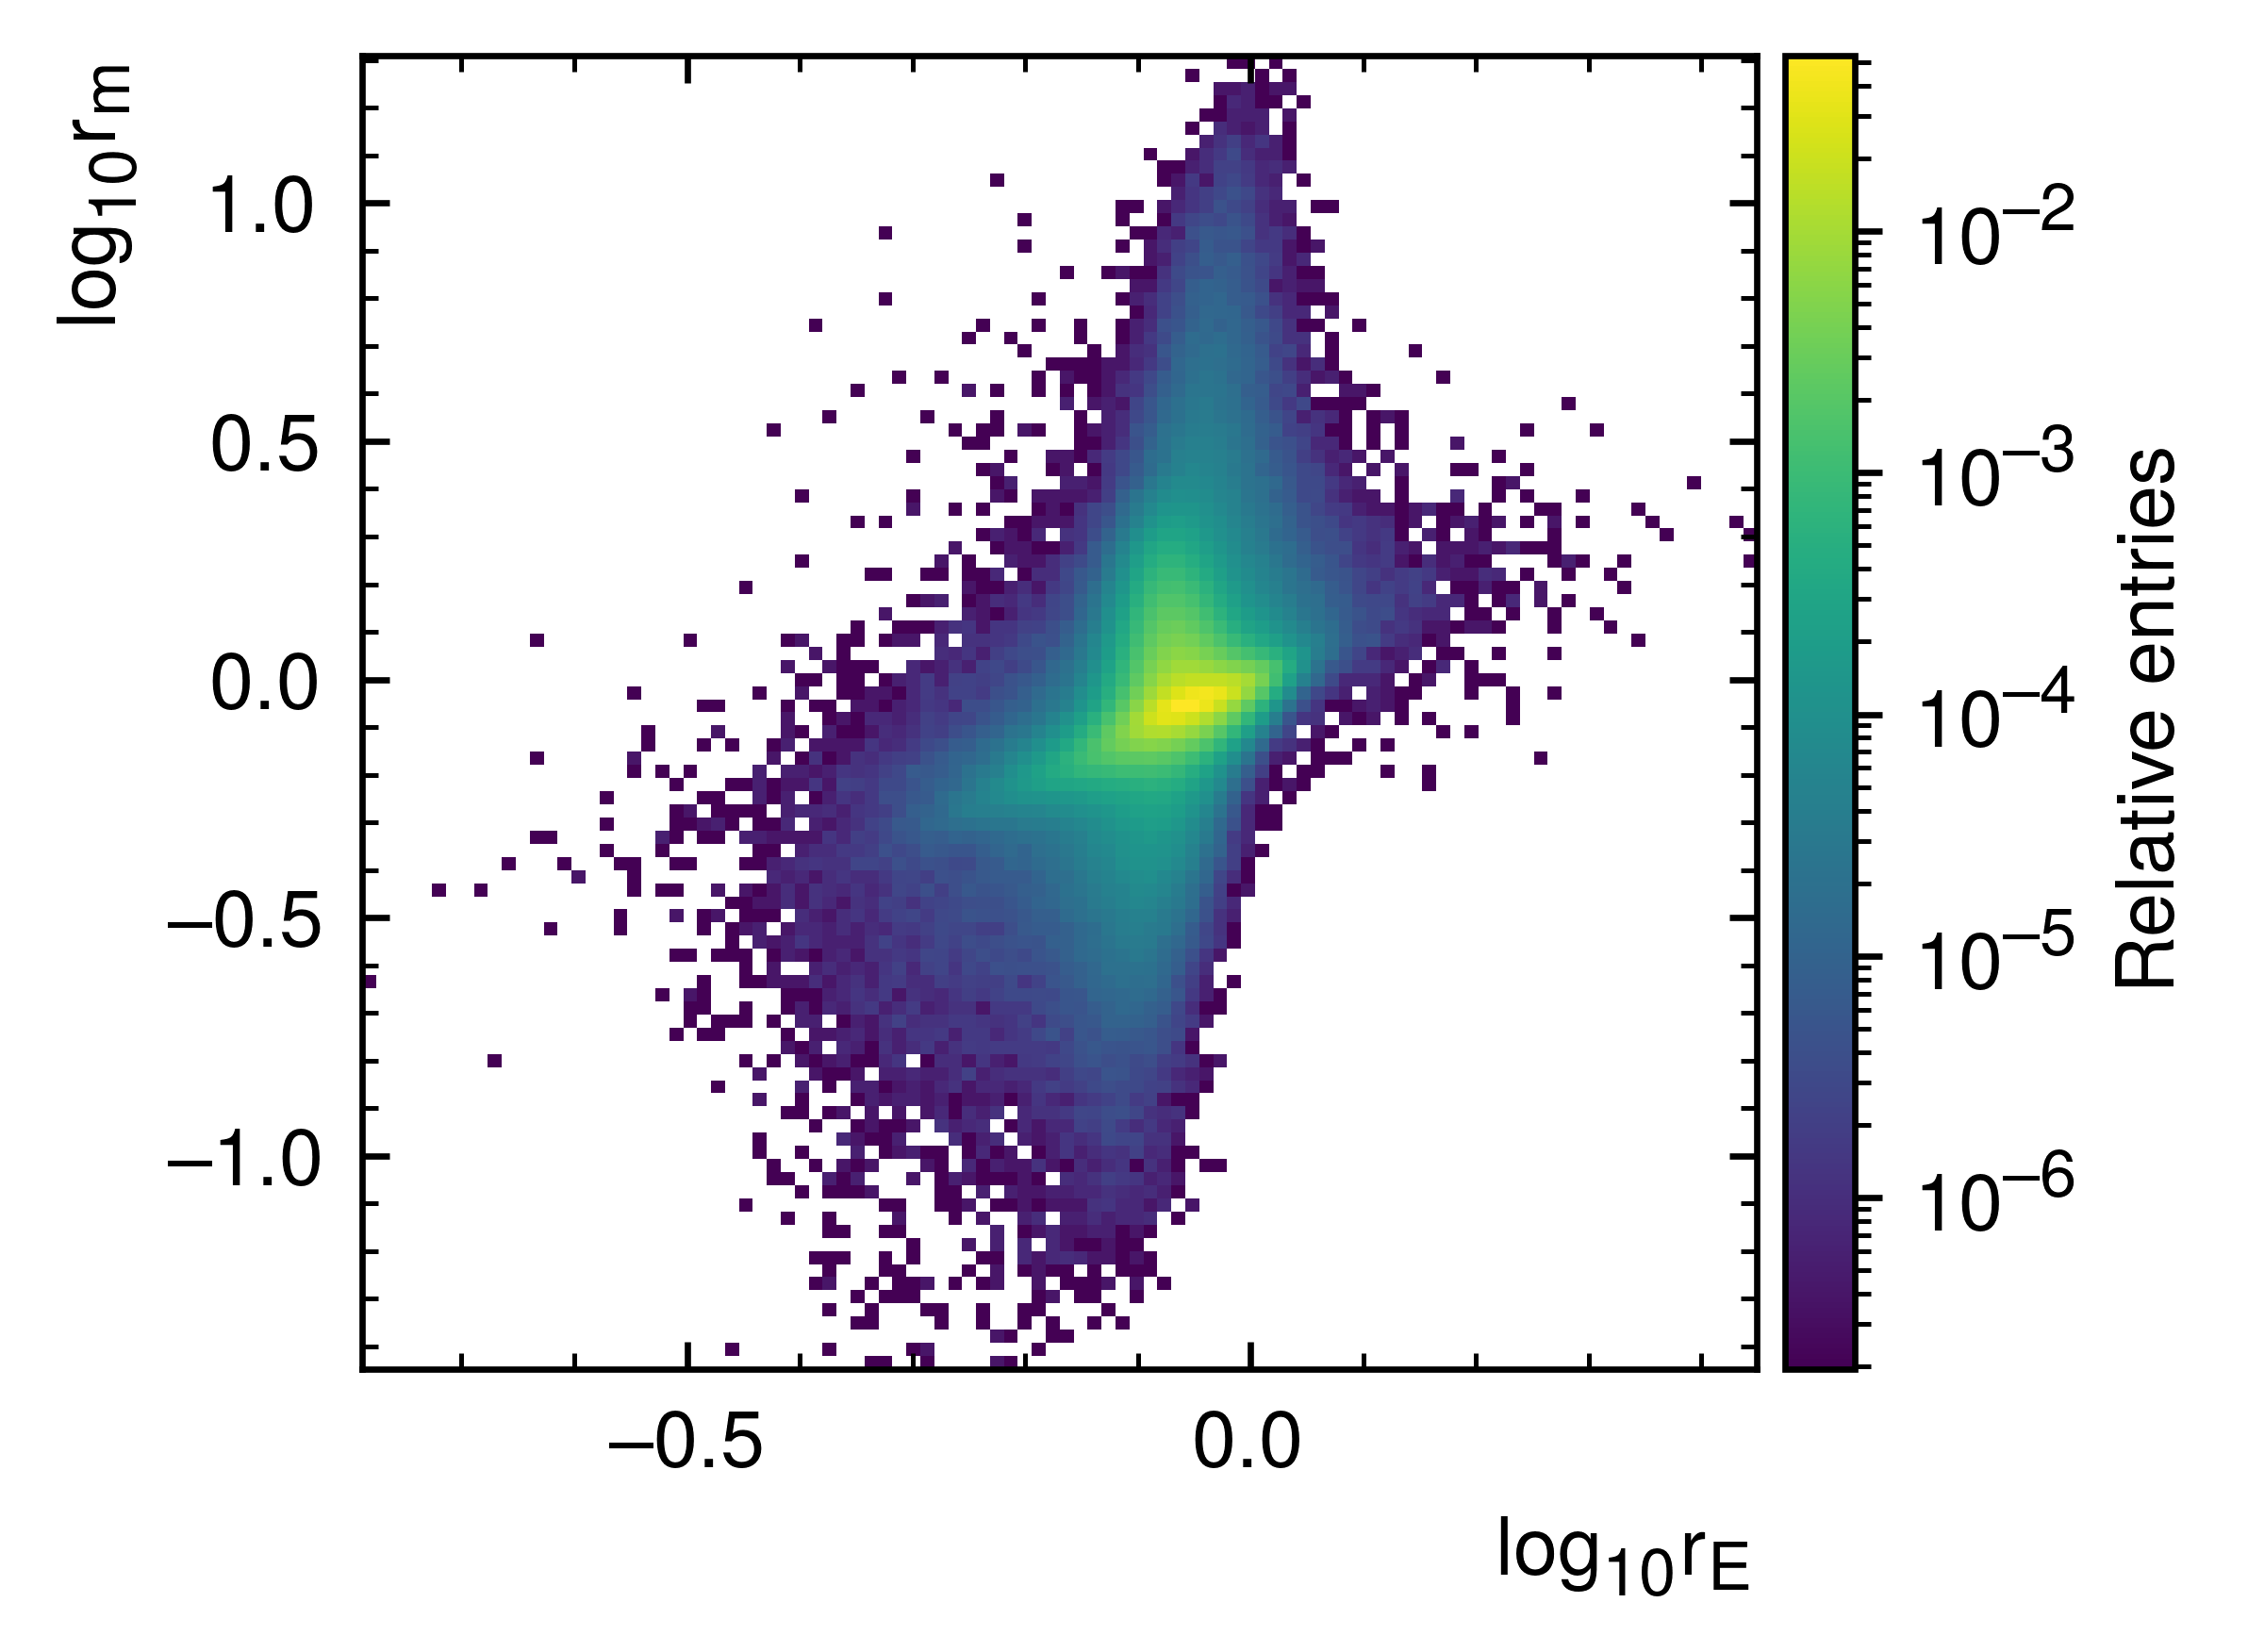

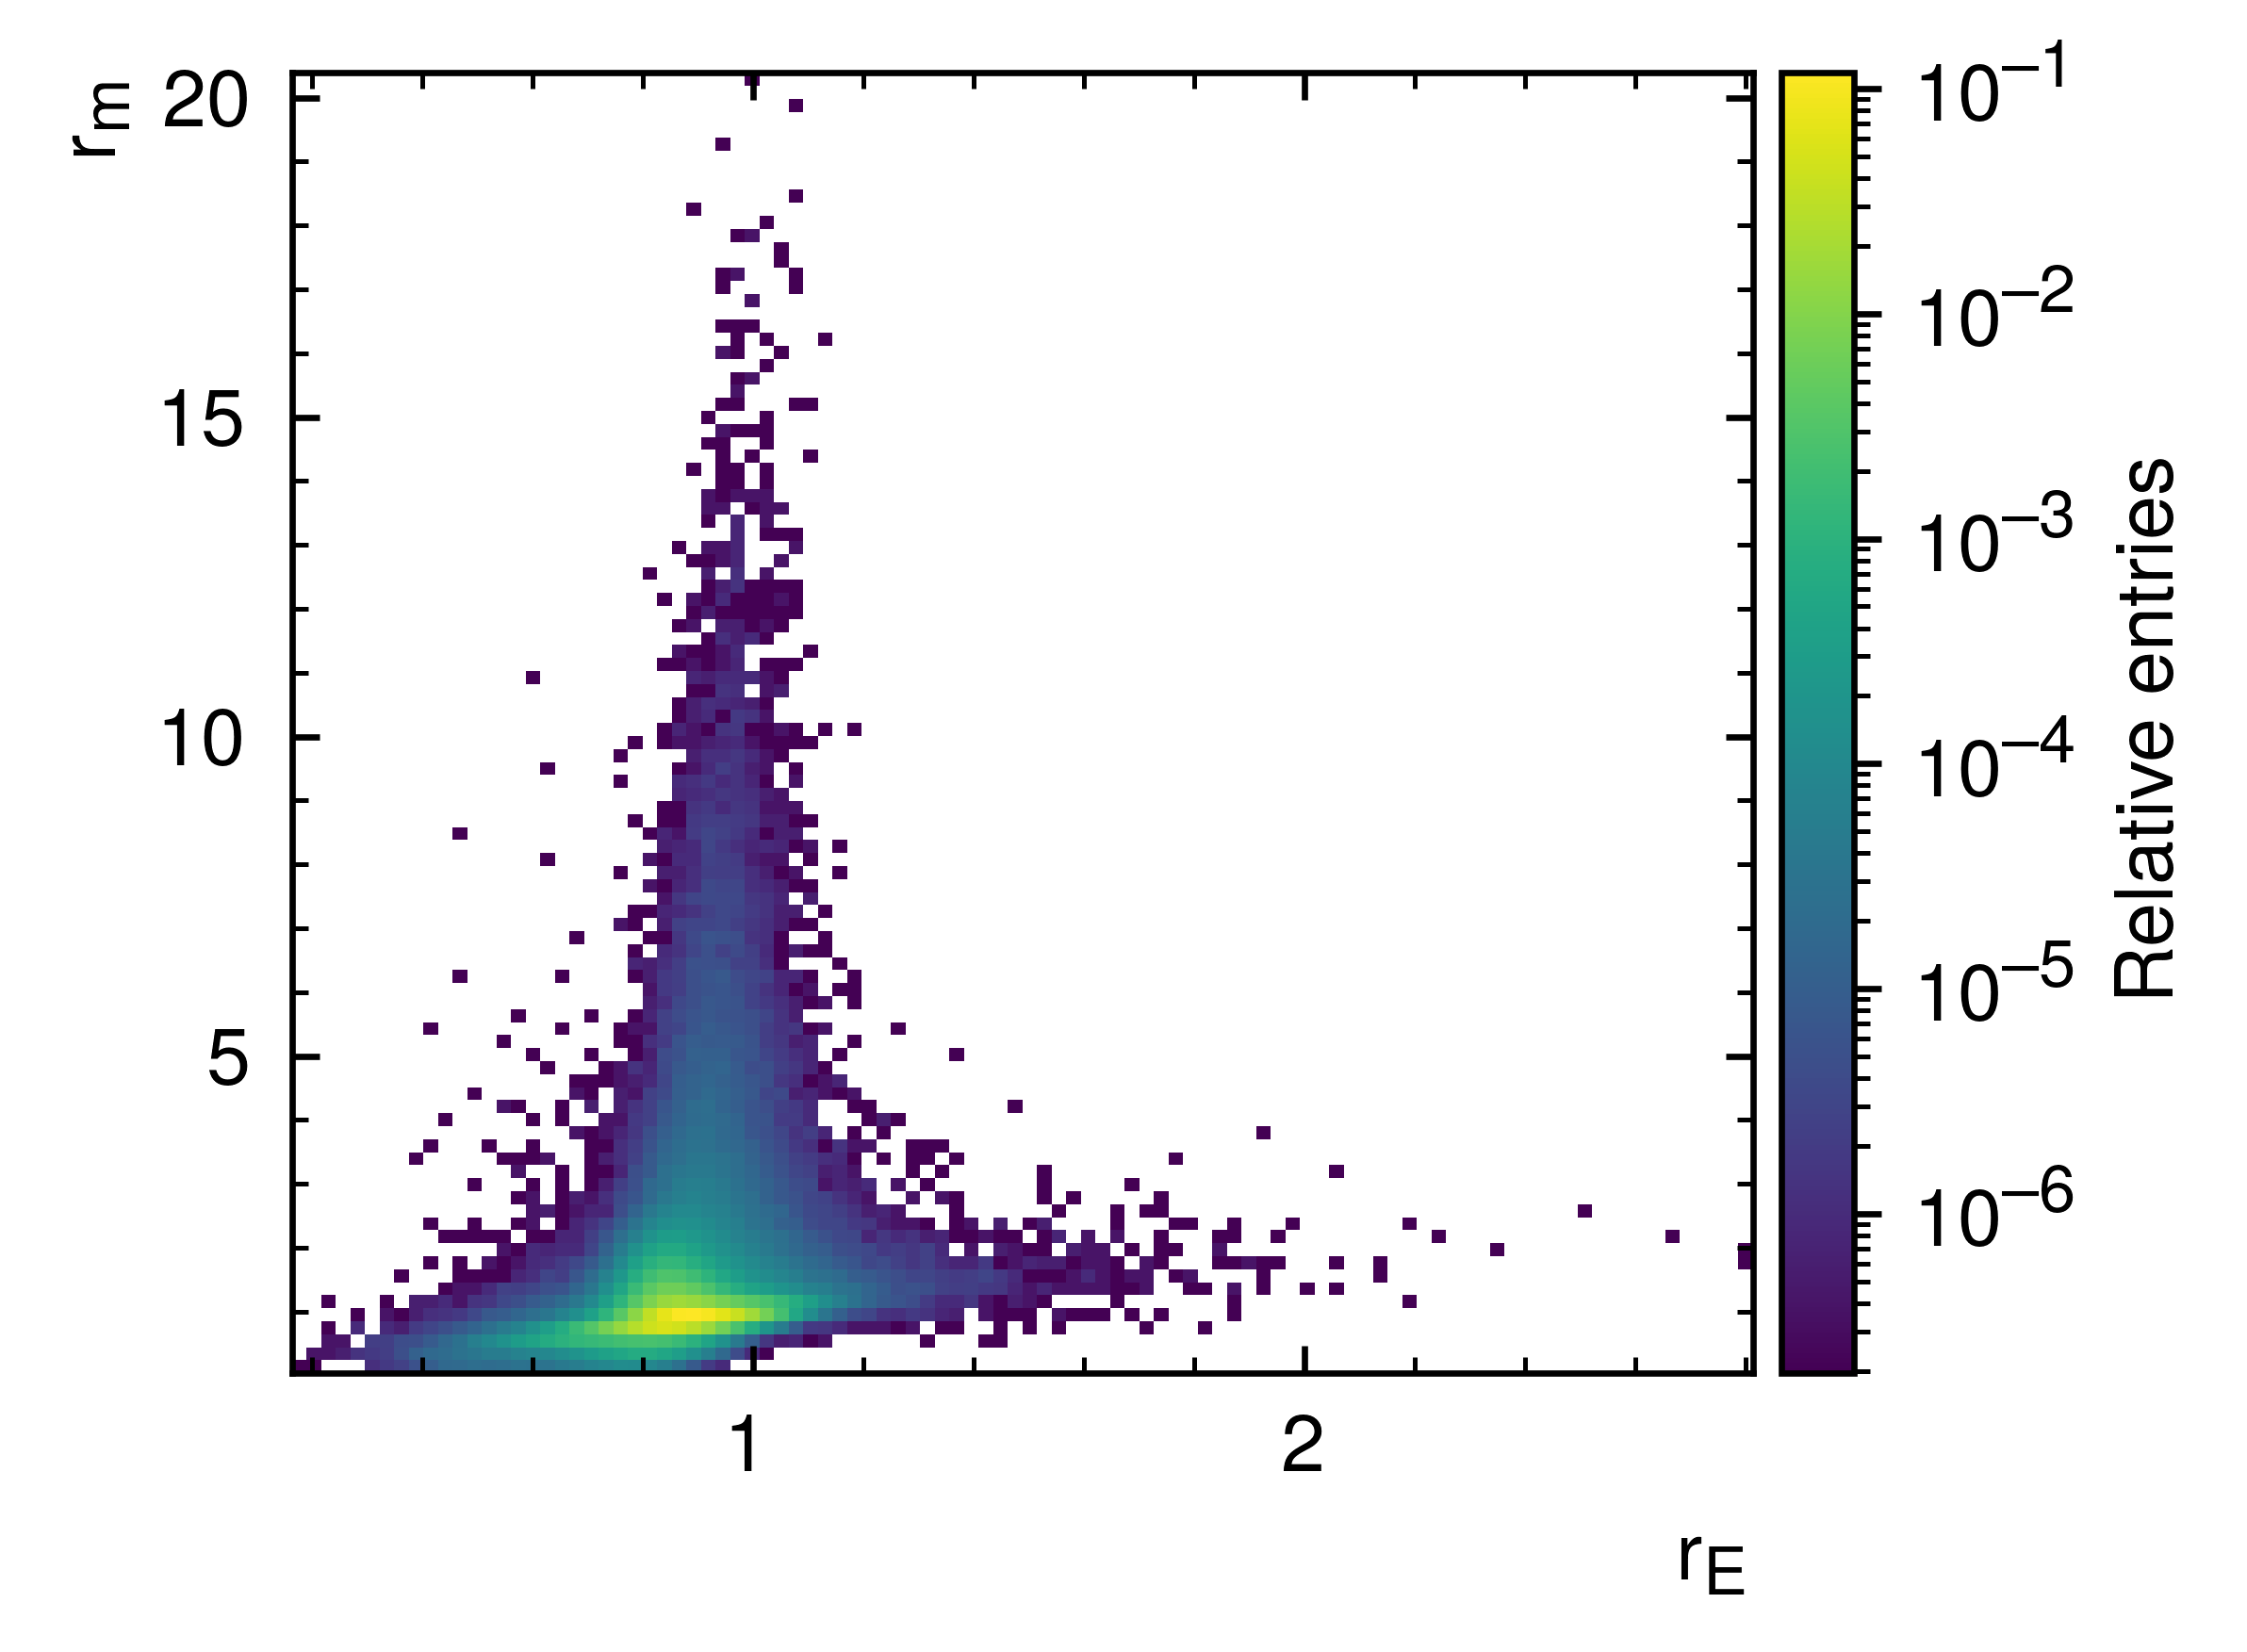

In [7]:
from Source.plots import make_hist_2dim

plt.close()

fig, axs = make_hist_2dim(
    data=[target_data[:,0], target_data[:,1]],
    labels=[r"$\text{log}_{10} r_E$", r"$\text{log}_{10} r_m$"],
    ranges=[[min_values[0], max_values[0]], [min_values[1], max_values[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/target_correlations_log.pdf")

plt.close()

fig, axs = make_hist_2dim(
    data=[np.pow(10., target_data[:,0]), np.pow(10., target_data[:,1])],
    labels=[r"$r_E$", r"$r_m$"],
    ranges=[[np.power(10., min_values[0]), np.power(10., max_values[0])], [np.power(10., min_values[1]), np.power(10., max_values[1])]],
    showdiag=False,
    nbins=[100,100],
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/target_correlations.pdf")

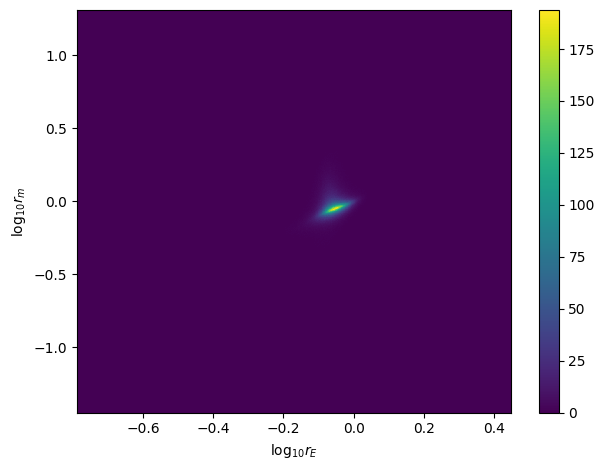

In [32]:
plt.figure()

plt.hist2d(target_data[:,0], target_data[:,1], bins=1000, density=True)
plt.xlabel(r"$\text{log}_{10} r_E$")
plt.ylabel(r"$\text{log}_{10} r_m$")

plt.colorbar()
plt.tight_layout()

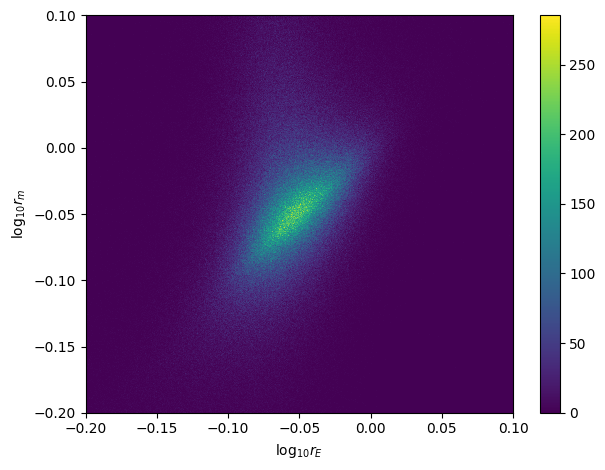

In [31]:
plt.figure()

plt.hist2d(target_data[:,0], target_data[:,1], range=[[-0.2, 0.1], [-0.2, 0.1]], bins=1000, density=True)
plt.xlabel(r"$\text{log}_{10} r_E$")
plt.ylabel(r"$\text{log}_{10} r_m$")

plt.colorbar()
plt.tight_layout()